<center><h1 style="font-size:48px"> 🍄 Mushroom Classification 🍄‍🟫 </h1>
<img src="https://i.giphy.com/media/v1.Y2lkPTc5MGI3NjExMDg3ODMzZmJtaWYzcWdmdGpjejh2cGVmcnhvODljcXFiNzZvam9vNSZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/yh3E9kaUHjKaXtF9v1/giphy.gif"></center>


# Feature Description
<div class="alert alert-block alert-info" style="font-family: verdana; font-size: 16px; line-height: 1.7;">
    <ol>
        <li><p><strong>Cap Diameter</strong>: The measurement of the cap across its widest point. It helps in identifying the mushroom’s size and can range from a few millimeters to several centimeters.</p>
        </li>
        <li><p><strong>Cap Shape</strong>: The overall shape of the cap, such as conical, bell-shaped, flat, or wavy. This characteristic helps in distinguishing different species.</p>
        </li>
        <li><p><strong>Cap Surface</strong>: The texture and appearance of the cap’s surface. It can be smooth, scaly, sticky, or wrinkled, providing clues about the mushroom’s identity.</p>
        </li>
        <li><p><strong>Cap Color</strong>: The color of the cap, which can vary widely and may change as the mushroom matures. Color can be a key factor in identifying species.</p>
        </li>
        <li><p><strong>Does Bruise or Bleed</strong>: Refers to whether the mushroom changes color when bruised or if it releases a colored liquid. This reaction can be important for identification.</p>
        </li>
        <li><p><strong>Gill Attachment</strong>: How the gills are attached to the stem. They can be free (not attached), attached (connected to the stem), or descending (extending down the stem).</p>
        </li>
        <li><p><strong>Gill Spacing</strong>: The distance between gills. Gills can be crowded, spaced, or intermediate in their spacing.</p>
        </li>
        <li><p><strong>Gill Color</strong>: The color of the gills, which can help in distinguishing species and may change with age.</p>
        </li>
        <li><p><strong>Stem Height</strong>: The length of the stem from the ground to where the cap is attached. Variations in stem height can aid in identification.</p>
        </li>
        <li><p><strong>Stem Width</strong>: The diameter of the stem. It can be narrow, medium, or wide, and varies among species.</p>
        </li>
        <li><p><strong>Stem Root</strong>: The base of the stem, which can be swollen, bulbous, or tapering. Observing the stem’s base can help identify certain mushrooms.</p>
        </li>
        <li><p><strong>Stem Surface</strong>: The texture and appearance of the stem’s surface. It can be smooth, fibrous, scaly, or rough.</p>
        </li>
        <li><p><strong>Stem Color</strong>: The color of the stem, which might be uniform or vary along its length.</p>
        </li>
        <li><p><strong>Veil Type</strong>: Refers to the type of veil present on the mushroom, such as a partial veil (covering the gills and often forming a ring) or a universal veil (enveloping the entire mushroom in its early stages).</p>
        </li>
        <li><p><strong>Veil Color</strong>: The color of the veil. It can be a key characteristic for identifying mushrooms, especially in distinguishing between species with similar appearances.</p>
        </li>
        <li><p><strong>Has Ring</strong>: Indicates whether the mushroom has a ring (also called an annulus) around the stem, which is a remnant of the partial veil.</p>
        </li>
        <li><p><strong>Ring Type</strong>: Describes the type of ring present, such as a single ring, double ring, or a ring that is flaring or hanging.</p>
        </li>
        <li><p><strong>Spore Print Color</strong>: The color of the spore print obtained by placing the cap on a white sheet of paper. This is a critical identifying feature.</p>
        </li>
        <li><p><strong>Habitat</strong>: The environment where the mushroom is found, such as woodlands, grasslands, or urban areas. The habitat can help narrow down the possible species.</p>
        </li>
        <li><p><strong>Season</strong>: The time of year when the mushroom appears. Different species fruit in different seasons, which helps in identification.</p>
        </li>
    </ol>
</div>

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

from sklearn.impute import SimpleImputer
from sklearn.model_selection import StratifiedKFold, train_test_split, cross_val_score, cross_validate
from sklearn.metrics import matthews_corrcoef, f1_score, confusion_matrix, ConfusionMatrixDisplay, make_scorer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import make_pipeline, Pipeline
from scipy.stats import mode

from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import HistGradientBoostingClassifier, VotingClassifier, StackingClassifier

# Loading Data

In [2]:
train_df = pd.read_csv("../data/train.csv", index_col='id')
orig_df = pd.read_csv("../data/secondary_data.csv", sep=";")
test_df = pd.read_csv("../data/test.csv", index_col='id')

In [3]:
train_df = pd.concat([train_df, orig_df], ignore_index=True)

In [4]:
train_df.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,e,8.80,f,s,u,f,a,c,w,4.51,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,p,4.51,x,h,o,f,a,c,n,4.79,...,NaN,y,o,NaN,NaN,t,z,NaN,d,w
2,e,6.94,f,s,b,f,x,c,w,6.85,...,NaN,s,n,NaN,NaN,f,f,NaN,l,w
3,e,3.88,f,y,g,f,s,NaN,g,4.16,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
4,e,5.85,x,l,w,f,d,NaN,w,3.37,...,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a


In [5]:
test_df.head()

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
id,,,,,,,,,,,,,,,,,,,,
3116945,8.64,x,NaN,n,t,NaN,NaN,w,11.13,17.12,b,NaN,w,u,w,t,g,NaN,d,a
3116946,6.90,o,t,o,f,NaN,c,y,1.27,10.75,NaN,NaN,n,NaN,NaN,f,f,NaN,d,a
3116947,2.00,b,g,n,f,NaN,c,n,6.18,3.14,NaN,NaN,n,NaN,NaN,f,f,NaN,d,s
3116948,3.47,x,t,n,f,s,c,n,4.98,8.51,NaN,NaN,w,NaN,n,t,z,NaN,d,u
3116949,6.17,x,h,y,f,p,NaN,y,6.73,13.70,NaN,NaN,y,NaN,y,t,NaN,NaN,d,u


# EDA

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3178014 entries, 0 to 3178013
Data columns (total 21 columns):
 #   Column                Dtype  
---  ------                -----  
 0   class                 object 
 1   cap-diameter          float64
 2   cap-shape             object 
 3   cap-surface           object 
 4   cap-color             object 
 5   does-bruise-or-bleed  object 
 6   gill-attachment       object 
 7   gill-spacing          object 
 8   gill-color            object 
 9   stem-height           float64
 10  stem-width            float64
 11  stem-root             object 
 12  stem-surface          object 
 13  stem-color            object 
 14  veil-type             object 
 15  veil-color            object 
 16  has-ring              object 
 17  ring-type             object 
 18  spore-print-color     object 
 19  habitat               object 
 20  season                object 
dtypes: float64(3), object(18)
memory usage: 509.2+ MB


In [5]:
pd.DataFrame({
    'column': train_df.columns,
    'null-count': train_df.isna().sum().values,
    '% null-count': np.round(train_df.isna().sum().values*100/len(train_df),6)
}).sort_values(by='null-count', ascending=False).reset_index(drop=True)

,column,null-count,% null-count
0,veil-type,3015385,94.882685
1,spore-print-color,2904397,91.390315
2,stem-root,2808561,88.374721
3,veil-color,2794603,87.935516
4,stem-surface,2018985,63.529770
5,gill-spacing,1283498,40.386795
6,cap-surface,685143,21.558841
7,gill-attachment,533820,16.797283
8,ring-type,131351,4.133116
9,gill-color,57,0.001794


In [8]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
cap-diameter,3178010.0,6.317996,4.670698,0.03,3.32,5.75,8.24,80.67
stem-height,3178014.0,6.352815,2.714383,0.00,4.67,5.88,7.41,88.72
stem-width,3178014.0,11.172917,8.138274,0.00,4.97,9.66,15.65,103.91


In [9]:
train_df.describe(include='O').T

,count,unique,top,freq
class,3178014,2,p,1739284
cap-shape,3177974,74,x,1462960
cap-surface,2492871,83,t,468973
cap-color,3178002,78,n,1383760
does-bruise-or-bleed,3178006,26,f,2620222
gill-attachment,2644194,78,a,658732
gill-spacing,1894516,48,c,1355764
gill-color,3177957,63,w,950059
stem-root,369453,38,b,168978
stem-surface,1159029,60,s,333635


In [6]:
train_df.duplicated().sum()

146

In [6]:
train_df.drop_duplicates(inplace=True)

In [7]:
target = 'class'

In [8]:
features = train_df.drop(target, axis=1).columns.to_list()
features

['cap-diameter',
 'cap-shape',
 'cap-surface',
 'cap-color',
 'does-bruise-or-bleed',
 'gill-attachment',
 'gill-spacing',
 'gill-color',
 'stem-height',
 'stem-width',
 'stem-root',
 'stem-surface',
 'stem-color',
 'veil-type',
 'veil-color',
 'has-ring',
 'ring-type',
 'spore-print-color',
 'habitat',
 'season']

In [9]:
features_with_high_null_values = [feature for feature in features if (train_df[feature].isna().sum()/len(train_df)*100)>20]
features_with_high_null_values

['cap-surface',
 'gill-spacing',
 'stem-root',
 'stem-surface',
 'veil-type',
 'veil-color',
 'spore-print-color']

In [10]:
categorical_features = train_df[features].select_dtypes(include='object').columns.to_list()
categorical_features

['cap-shape',
 'cap-surface',
 'cap-color',
 'does-bruise-or-bleed',
 'gill-attachment',
 'gill-spacing',
 'gill-color',
 'stem-root',
 'stem-surface',
 'stem-color',
 'veil-type',
 'veil-color',
 'has-ring',
 'ring-type',
 'spore-print-color',
 'habitat',
 'season']

In [11]:
numerical_features = list(set(features) - set(categorical_features))
numerical_features

['cap-diameter', 'stem-height', 'stem-width']

In [12]:
pd.concat([train_df, test_df])[categorical_features].describe(include='O').T

,count,unique,top,freq
cap-shape,5255761,108,x,2420907
cap-surface,4123785,114,t,775813
cap-color,5255807,109,n,2288054
does-bruise-or-bleed,5255814,29,f,4333738
gill-attachment,4372220,117,a,1089691
gill-spacing,3132740,66,c,2242712
gill-color,5255726,86,w,1570803
stem-root,609261,45,b,279559
stem-surface,1915361,87,s,552131
stem-color,5255773,88,w,2016928


## Distribution of Categorical Features

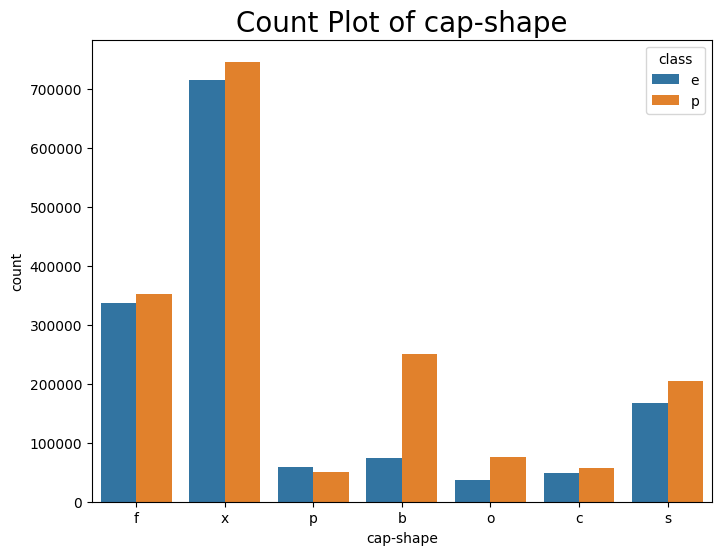

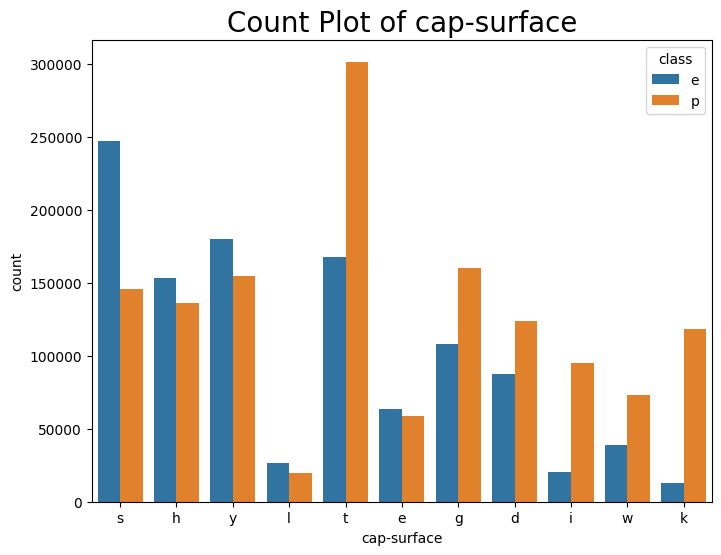

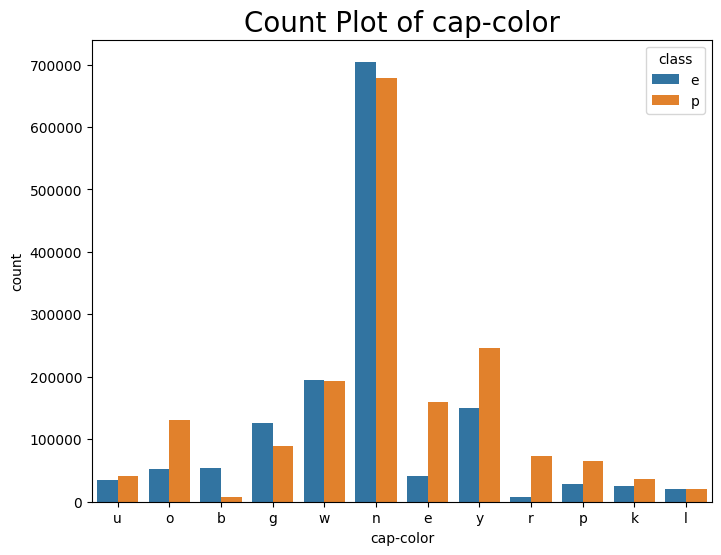

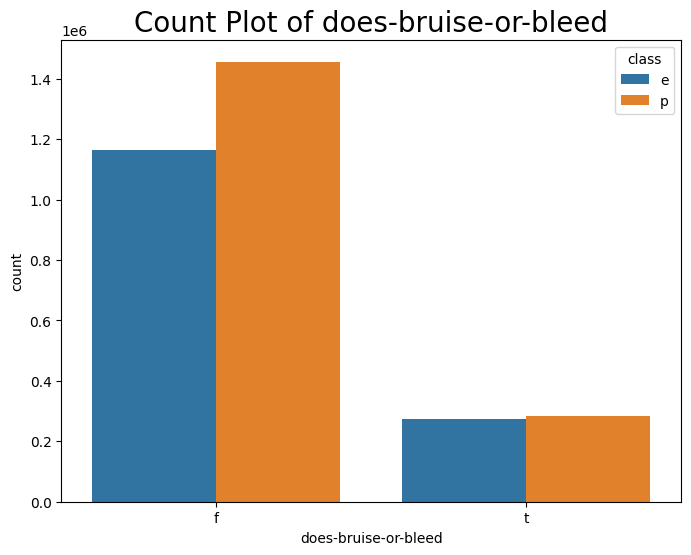

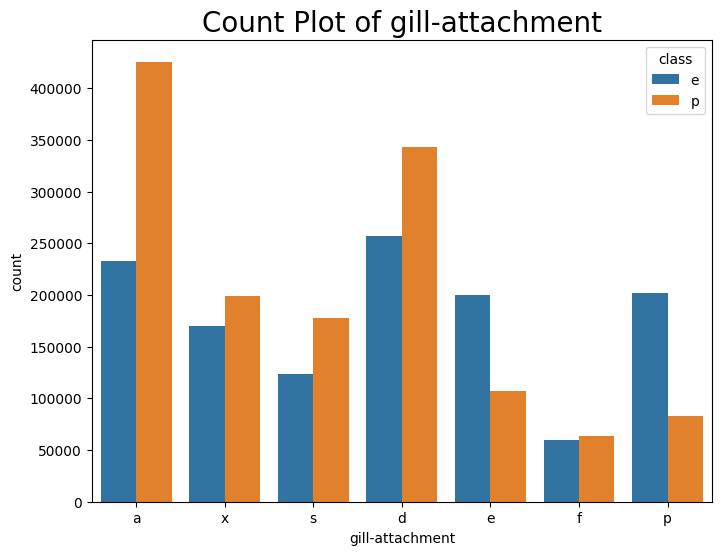

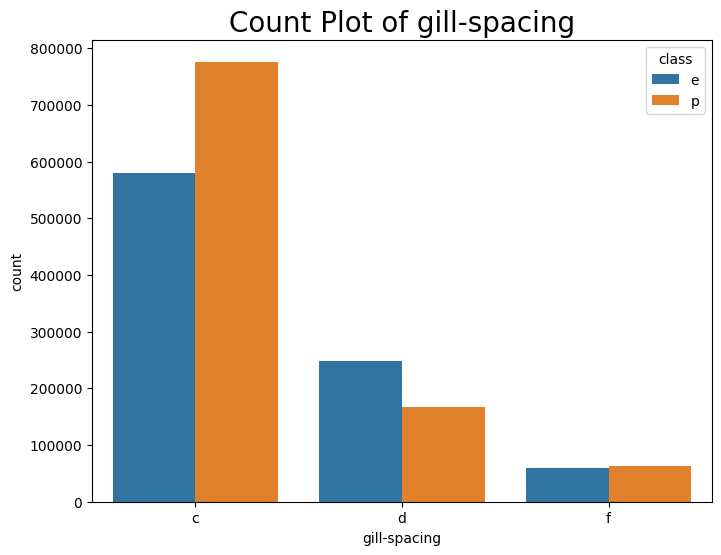

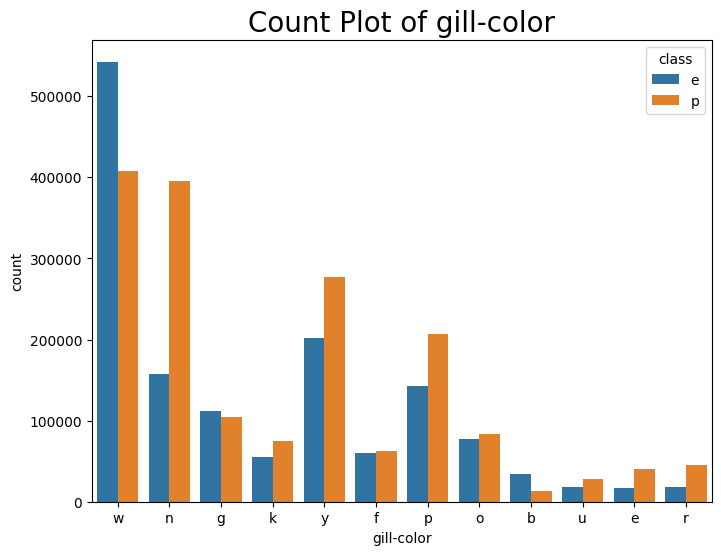

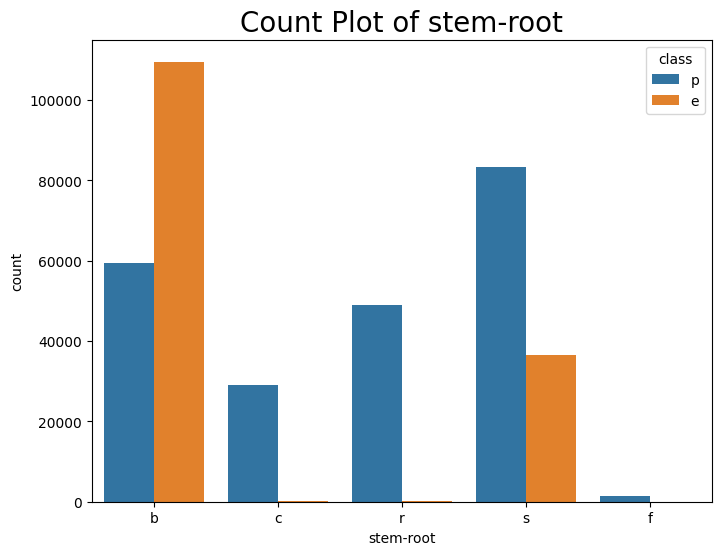

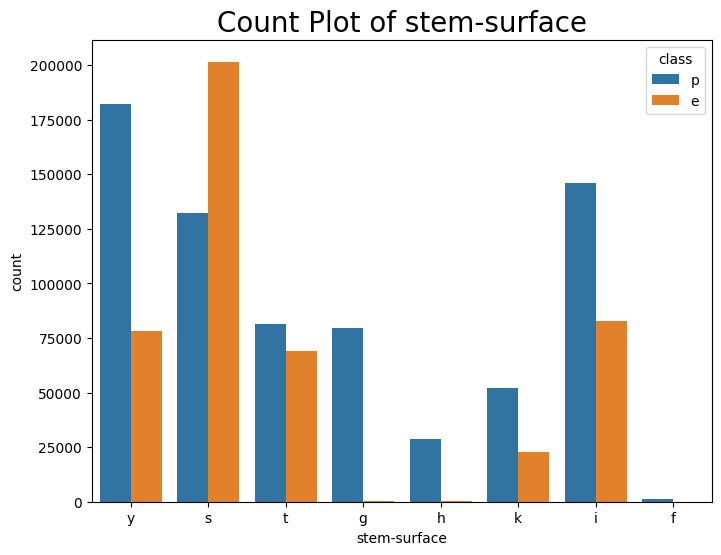

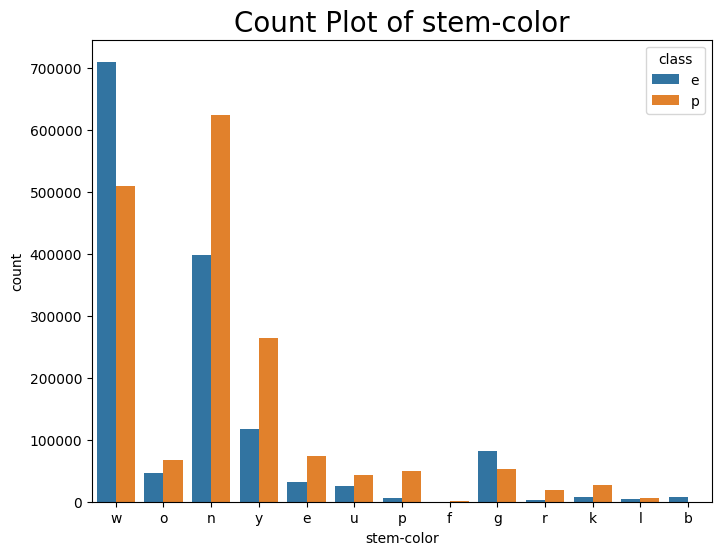

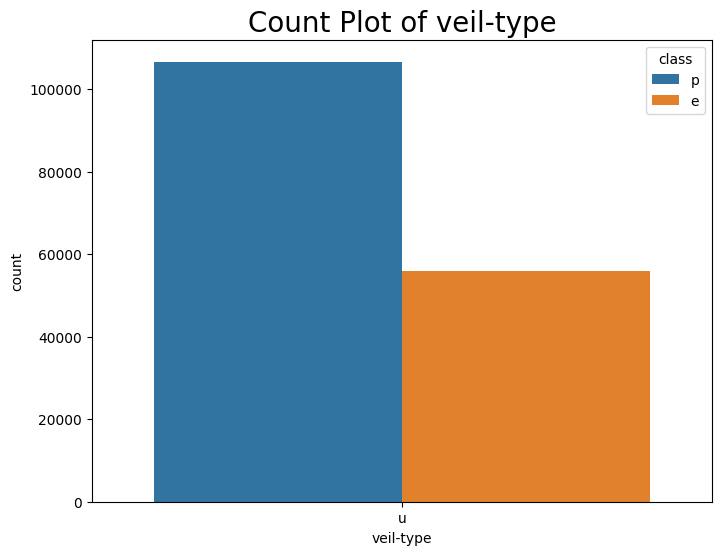

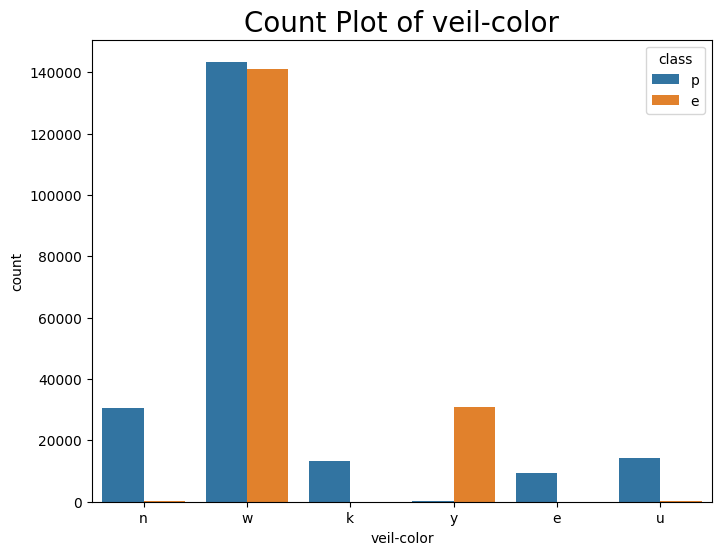

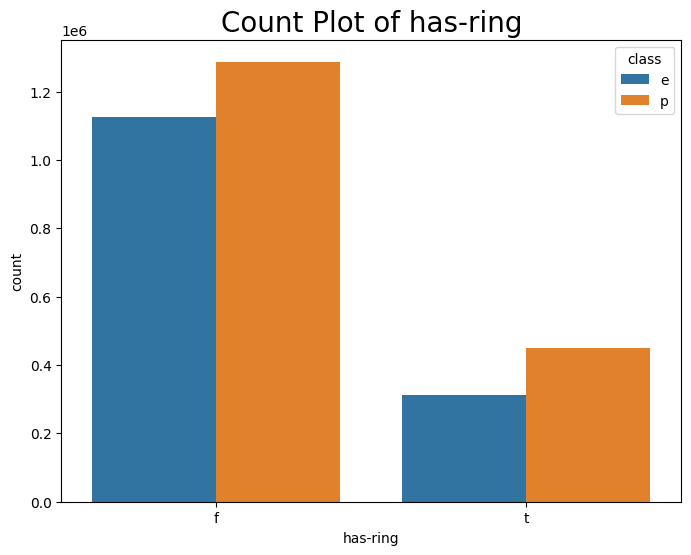

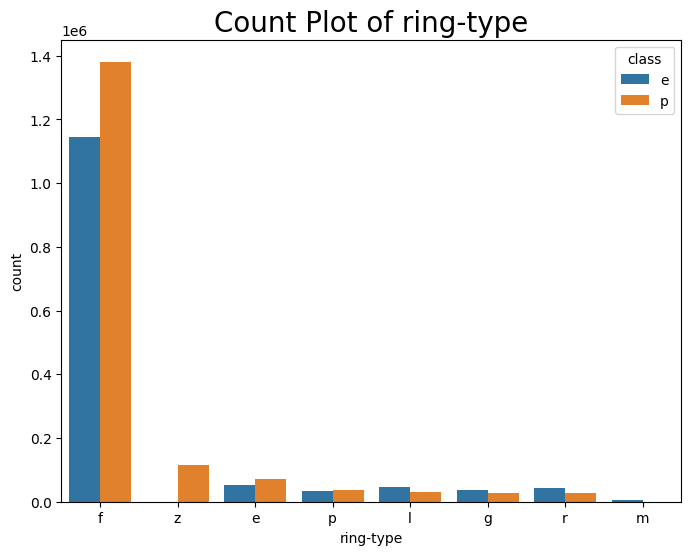

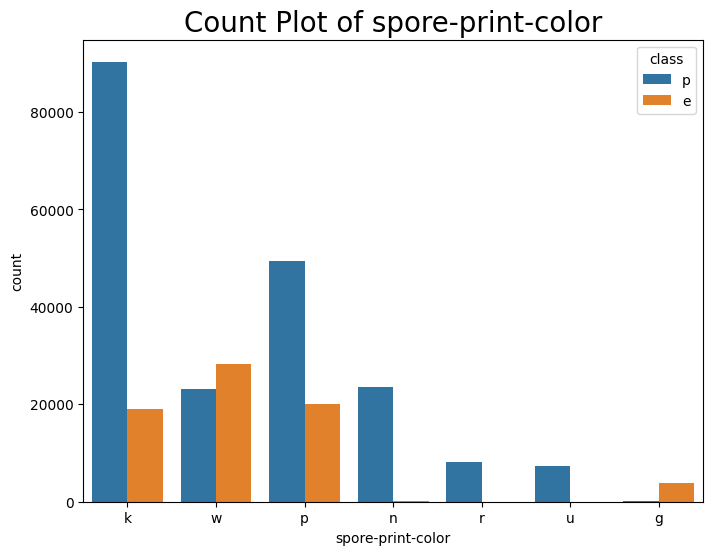

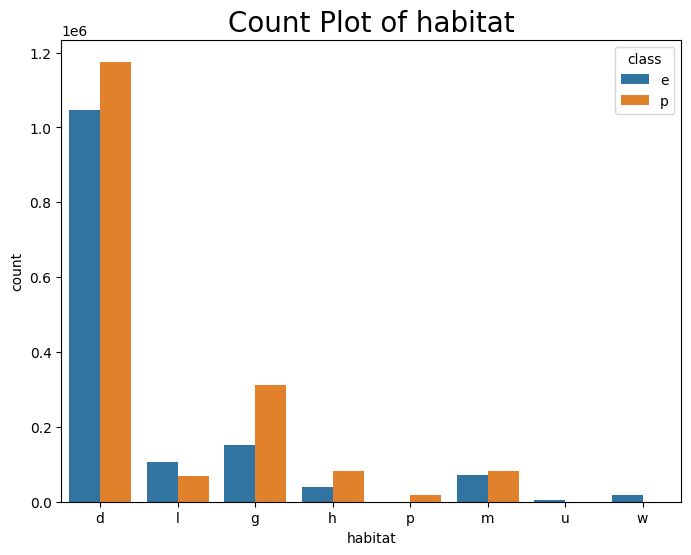

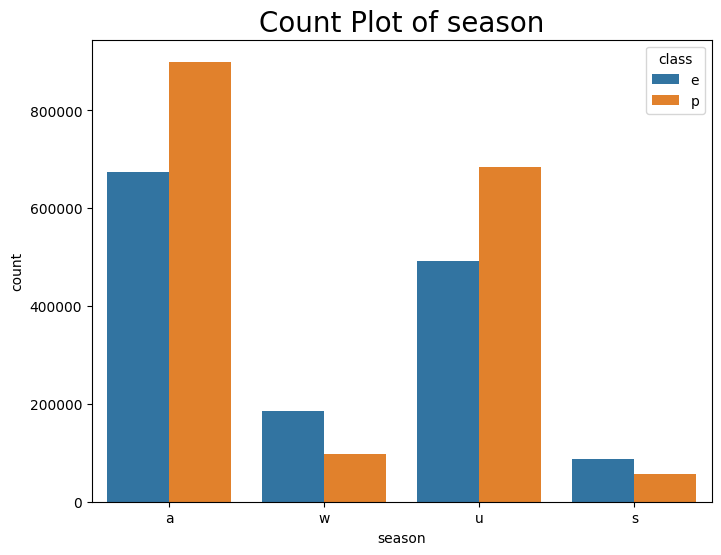

In [18]:
for i, col in enumerate(categorical_features):
    plt.figure(figsize=(8, 6))
    
    fil_data = train_df[col].value_counts()
    fil_cat = fil_data[fil_data>=100].index
    fil_df = train_df[train_df[col].isin(fil_cat)]
    
    sns.countplot(x=col, hue=target, data=fil_df)
    
    plt.title(f"Count Plot of {col}", size=20)
    plt.show()

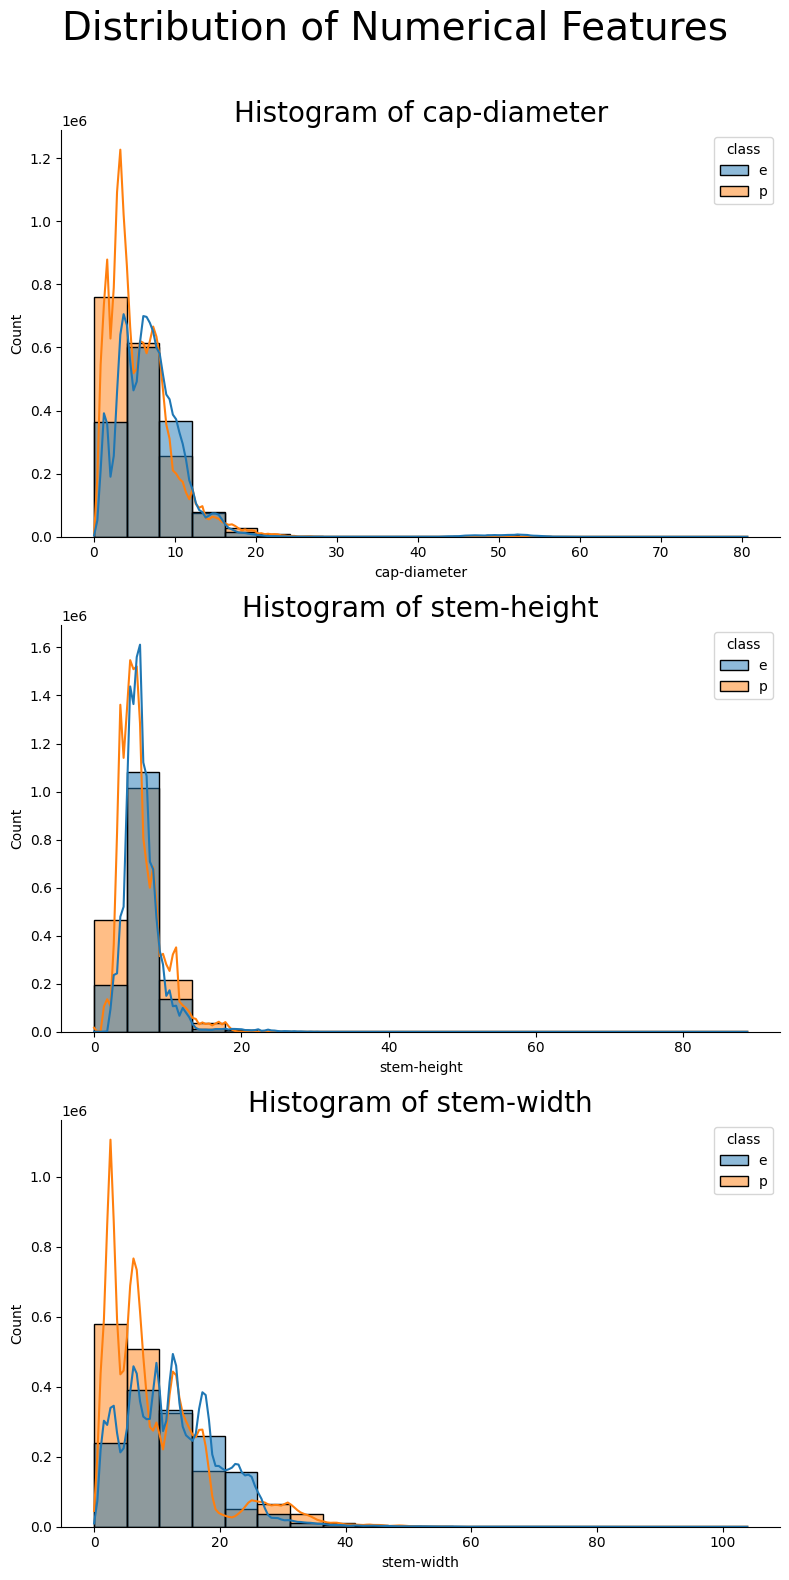

In [19]:
plt.figure(figsize=(8, 15))
for i, col in enumerate(numerical_features):
    plt.subplot(3, 1, i+1)
    sns.histplot(x=col, hue=target, data=train_df, kde=True, bins=20)
    plt.title(f"Histogram of {col}", size=20)
    sns.despine()
plt.tight_layout()
plt.suptitle("Distribution of Numerical Features", y=1.05, size=28)
plt.show()

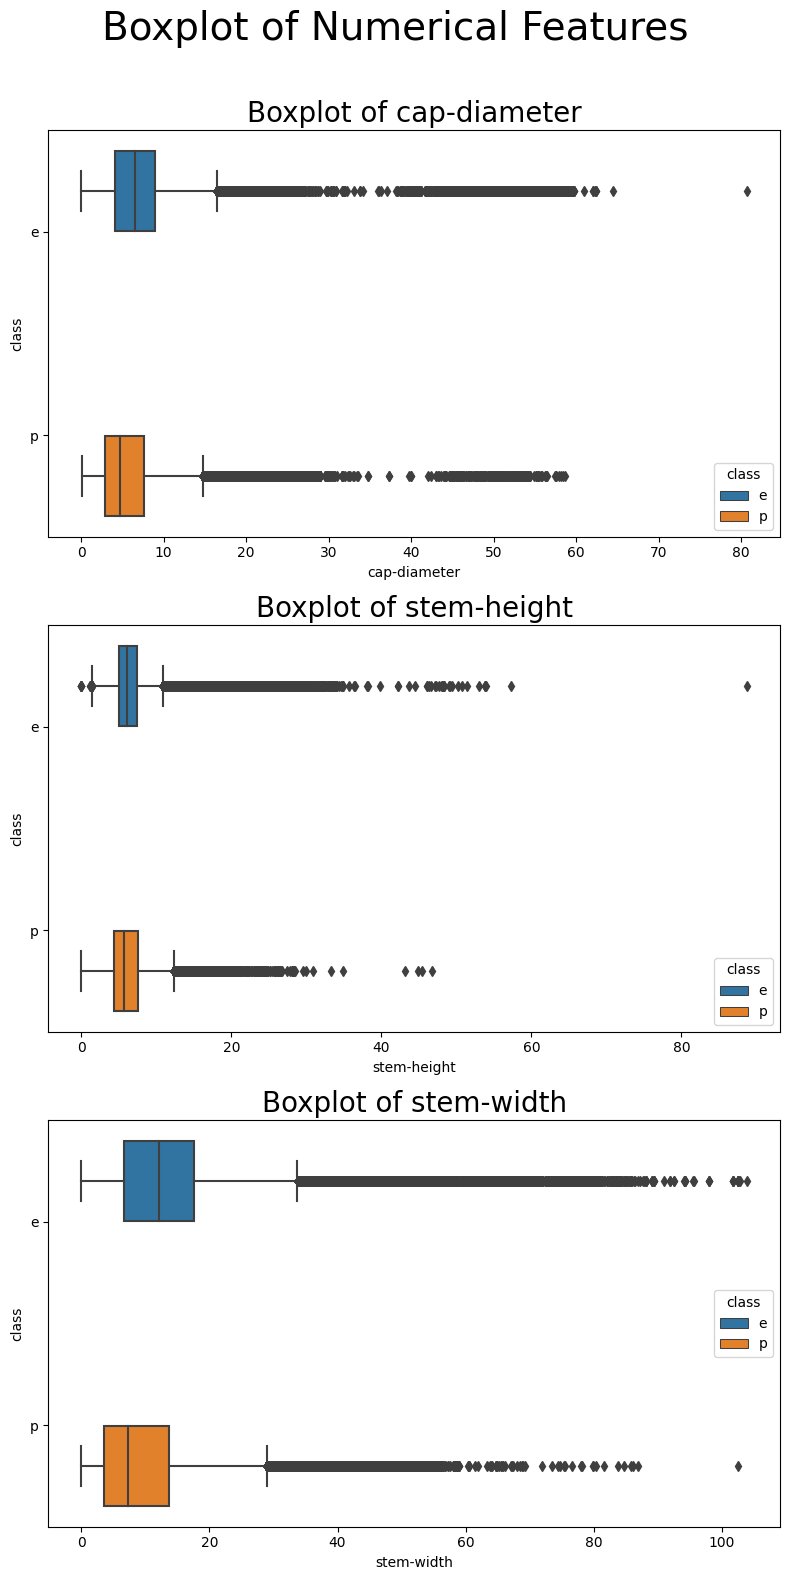

In [20]:
plt.figure(figsize=(8, 15))
for i, col in enumerate(numerical_features):
    plt.subplot(3, 1, i+1)
    sns.boxplot(x=col, y=target, hue=target, data=train_df)
    plt.title(f"Boxplot of {col}", size=20)
plt.tight_layout()
plt.suptitle("Boxplot of Numerical Features", y=1.05, size=28)
plt.show()

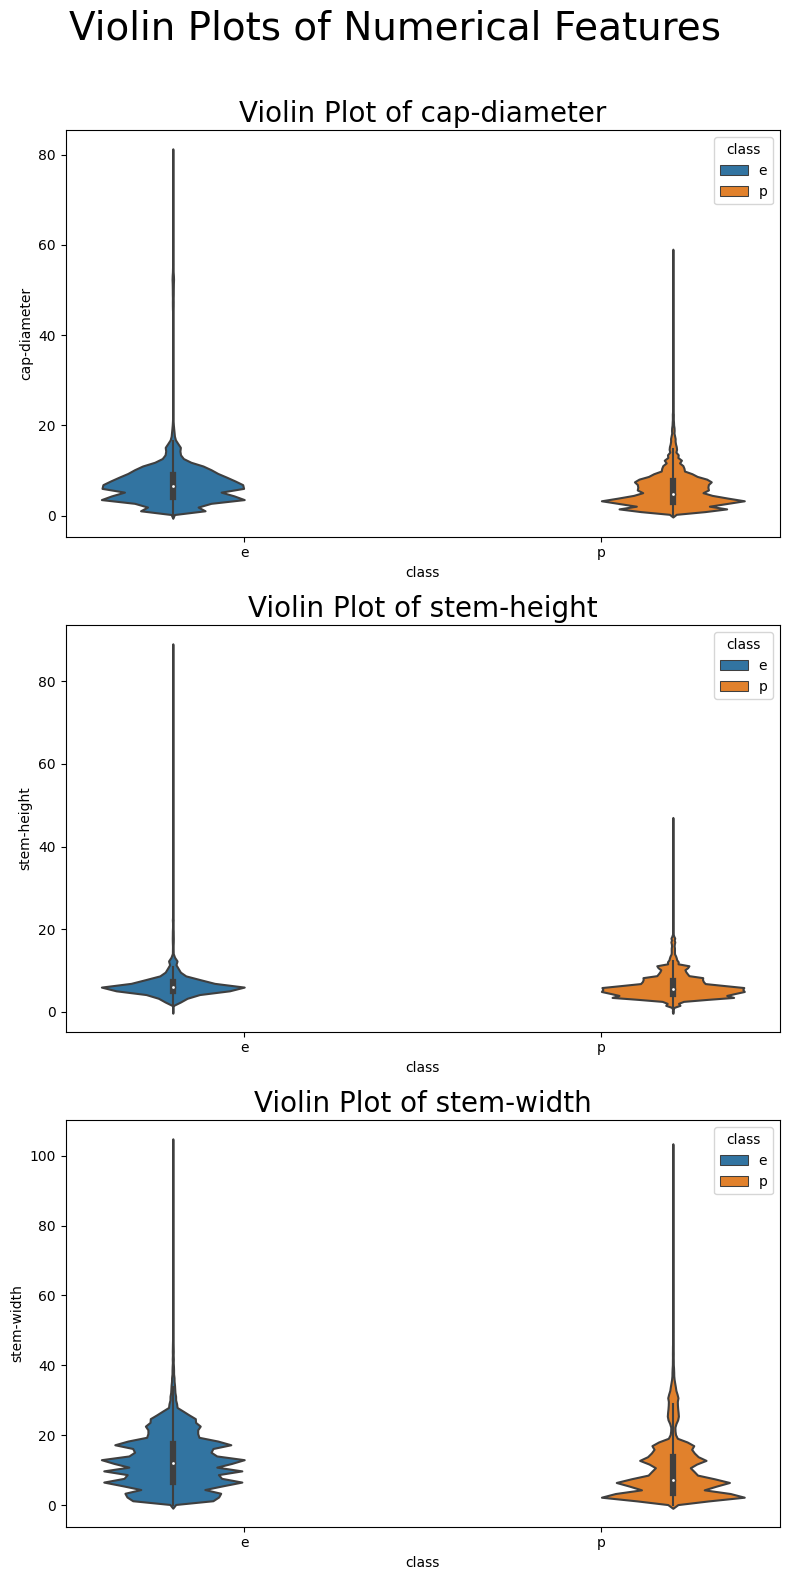

In [21]:
plt.figure(figsize=(8, 15))
for i, col in enumerate(numerical_features):
    plt.subplot(3, 1, i+1)
    sns.violinplot(x=target, y=col, hue=target, data=train_df)
    plt.title(f"Violin Plot of {col}", size=20)
plt.tight_layout()
plt.suptitle("Violin Plots of Numerical Features", y=1.05, size=28)
plt.show()

## Target Distribution

[]

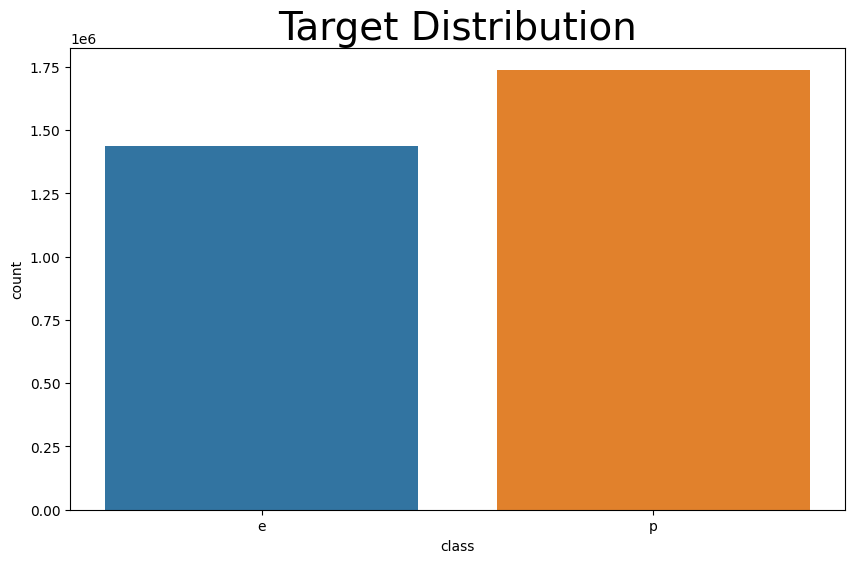

In [22]:
plt.figure(figsize=(10, 6))
sns.countplot(x=target, data=train_df)
plt.title("Target Distribution", size=28)
plt.plot()

# Imputing Null Values

In [13]:
def cleaner(df):
    for col in categorical_features:
        df[col] = df[col].fillna('missing')
        df.loc[df[col].value_counts(dropna=False)[df[col]].values < 100, col] = "noise"
        df[col] = df[col].astype('category')

    return df

In [14]:
train_df = cleaner(train_df)
test_df = cleaner(test_df)

In [15]:
cap_diameter_mean = pd.concat([train_df['cap-diameter'], test_df['cap-diameter']]).mean(numeric_only=True)
train_df['cap-diameter'].fillna(cap_diameter_mean, inplace=True)
test_df['cap-diameter'].fillna(cap_diameter_mean, inplace=True)

# Model Training

In [16]:
X = train_df.copy()
y = X.pop(target)

lab_enc = LabelEncoder().fit(y)
y = lab_enc.transform(y)

In [17]:
def model_report(estimator, X, y, cv=5):
    print("="*80)
    print(f"    Model: {estimator.__class__.__name__}")
    print("="*80)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=1/cv, shuffle=True, stratify=y, random_state=42)
    
    estimator.fit(X_train, y_train)
    y_pred = estimator.predict(X_test)
    f1 = f1_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)
    print(f"F1 Score : {f1.mean():.6f}")
    print(f"MCC Score: {mcc.mean():.6f}")
    
    ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()
    plt.title("Confusion Matrix")
    plt.show()

    print()

In [18]:
def model_trainer(model, X, y, n_splits=5, random_state=42):
    skfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    
    oof_probs, oof_mccs = [], []
    print("="*80)
    print(f"Training {model.__class__.__name__}")
    print("="*80, end="\n")
    for fold, (train_idx, test_idx) in enumerate(skfold.split(X, y)):
        X_train, y_train = X.iloc[train_idx, :], y[train_idx]
        X_test, y_test = X.iloc[test_idx, :], y[test_idx]
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        mcc = matthews_corrcoef(y_pred, y_test)
        oof_mccs.append(mcc)
        oof_probs.append(model.predict_proba(test_df))
        print(f"--- Fold {fold+1} MCC Score: {mcc:.6f}")
    print(f"\n---> Mean MCC Score: {np.mean(oof_mccs):.6f} \xb1 {np.std(oof_mccs):.6f}\n\n")
    return oof_probs, oof_mccs

## Baseline Models

    Model: XGBClassifier
F1 Score : 0.992492
MCC Score: 0.983441


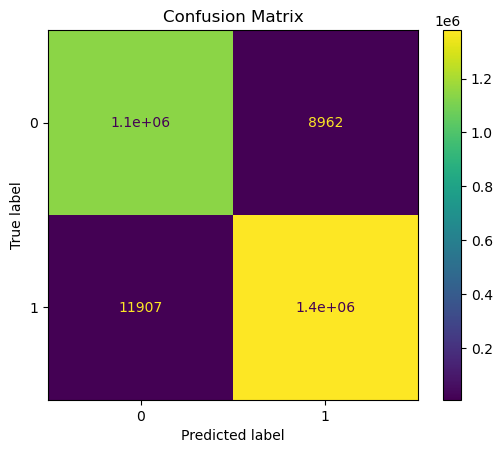

In [22]:
xgb_clf = XGBClassifier(enable_categorical=True, device="cuda", tree_method="hist")

model_report(xgb_clf, X, y)

In [19]:
cat_clf = CatBoostClassifier(
    cat_features=categorical_features,
    verbose=False,
    allow_writing_files=False,
    # task_type="GPU"
)

model_report(cat_clf, X, y)

    Model: CatBoostClassifier


    Model: LGBMClassifier


1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.


F1 Score : 0.991484
MCC Score: 0.981226


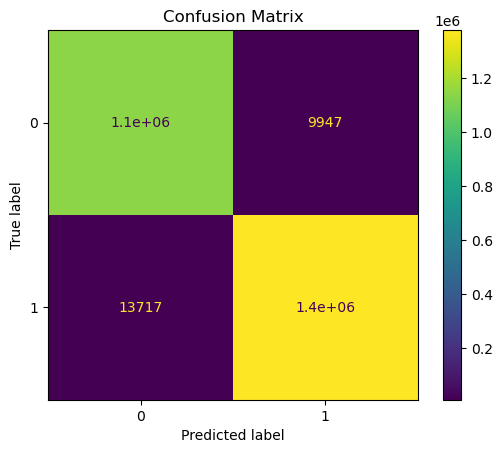

In [24]:
lgb_clf = LGBMClassifier(
    device='gpu', 
    verbosity=-1
)

model_report(lgb_clf, X, y)

## Hyperparameter Tuning

In [32]:
# import optuna
# from optuna.samplers import TPESampler

In [33]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, shuffle=True, stratify=y, random_state=101)

In [34]:
# def objective(trial):
#     params = {
#         "n_estimators": trial.suggest_int("n_estimators", 2000, 3000),
#         "eta": trial.suggest_float("eta", 1e-3, 1e-2),
#         "gamma": trial.suggest_float("gamma", 0, 5.0),
#         "max_depth": trial.suggest_int("max_depth", 2, 32),
#         "min_child_weight": trial.suggest_int("min_child_weight", 40, 100),
#         "subsample": trial.suggest_float("subsample", 0.1, 1.0),
#         "colsample_bytree": trial.suggest_float("colsample_bytree", 0.1, 1.0),
#         "grow_policy": trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"]),
#         "max_leaves": trial.suggest_int("max_leaves", 16, 84)
#     }
#     params['device'] = 'cuda'
#     params['tree_method'] = 'hist'
#     params['enable_categorical'] = True
    
#     model = XGBClassifier(**params)
#     model.fit(X_train, y_train)
    
#     y_pred = model.predict(X_test)
#     return matthews_corrcoef(y_test, y_pred)


# study_name = "xgb"
# storage = "sqlite:///xgb.db"

# study = optuna.create_study(storage=storage,
#                             study_name=study_name,
#                             direction="maximize",
# #                             sampler=TPESampler(),
#                             load_if_exists=True)

# study.optimize(objective, n_trials=100)

# print(study.best_params)


In [35]:
# def objective(trial):
#     params = {
#         "iterations": trial.suggest_int("iterations", 100, 3000),
#         "learning_rate": trial.suggest_float("learning_rate", 1e-3, 1e-1, log=True),
#         "depth": trial.suggest_int("depth", 4, 10),
#         "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 1e-8, 100.0, log=True),
#         "bootstrap_type": trial.suggest_categorical("bootstrap_type", ["Bayesian"]),
#         "random_strength": trial.suggest_float("random_strength", 1e-8, 10.0, log=True),
#         "bagging_temperature": trial.suggest_float("bagging_temperature", 0.0, 10.0),
#         "od_type": trial.suggest_categorical("od_type", ["IncToDec", "Iter"]),
#         "od_wait": trial.suggest_int("od_wait", 10, 50),
#         "verbose": False,
#         "allow_writing_files": False,
#         "task_type": 'GPU',
#         "cat_features": categorical_features
#     }

#     model = CatBoostClassifier(**params)

#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)
#     return matthews_corrcoef(y_test, y_pred)


# study_name = "cat"
# storage = "sqlite:///cat.db"

# study = optuna.create_study(storage=storage,
#                             study_name=study_name,
#                             direction="maximize",
#                             sampler=TPESampler(n_startup_trials=20, multivariate=True),
#                             load_if_exists=True)

# study.optimize(objective, n_trials=50)

# print(study.best_params)

In [36]:
# def objective(trial):
#     params = {
#         "lambda_l1": trial.suggest_float("lambda_l1", 1e-8, 10.0, log=True),
#         "lambda_l2": trial.suggest_float("lambda_l2", 1e-8, 10.0, log=True),
#         "num_leaves": trial.suggest_int("num_leaves", 2, 256),
#         "feature_fraction": trial.suggest_float("feature_fraction", 0.4, 1.0),
#         "bagging_fraction": trial.suggest_float("bagging_fraction", 0.4, 1.0),
#         "bagging_freq": trial.suggest_int("bagging_freq", 1, 7),
#         "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
#         "device": 'gpu',
#         "verbosity": -1
#     }

#     model = LGBMClassifier(**params)

#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)
#     return matthews_corrcoef(y_test, y_pred)


# study_name = "lgb"
# storage = "sqlite:///lgb.db"

# study = optuna.create_study(storage=storage,
#                             study_name=study_name,
#                             direction="maximize",
#                             sampler=TPESampler(n_startup_trials=20, multivariate=True),
#                             load_if_exists=True)

# study.optimize(objective, n_trials=100)

# print(study.best_params)

In [37]:
xgb_params = {
    'n_estimators': 2407,
    'eta': 0.009462133032592785,
    'gamma': 0.2865859948765318,
    'max_depth': 31,
    'min_child_weight': 47,
    'subsample': 0.6956431754146083,
    'colsample_bytree': 0.3670732604094118,
    'grow_policy': 'lossguide',
    'max_leaves': 73,
    'enable_categorical': True,
    'n_jobs': -1,
    'device': 'cuda',
    'tree_method': 'hist'
} # 0.9844272567086021

cat_params = {
    'iterations': 1041,
    'learning_rate': 0.08777255350163136,
    'depth': 10,
    'l2_leaf_reg': 0.1259643500248322,
    'bootstrap_type': 'Bayesian',
    'random_strength': 4.276181166674371e-08,
    'bagging_temperature': 0.35995482350907326,
    'od_type': 'Iter',
    'od_wait': 39,
    "verbose": False,
    "allow_writing_files": False,
    "task_type": 'GPU',
    "cat_features": categorical_features
} # 0.9841773055825763

lgb_params = {
    'n_estimators': 2500,
    'random_state':42,
    'max_bin':1024,
    'colsample_bytree':0.6,
    'reg_lambda': 80,
#     'device': 'gpu',
    'verbosity': -1
}

## Prediction

In [38]:
oof_probs = {}
# oof_probs['xgb'], _ = model_trainer(XGBClassifier(**xgb_params), X, y, random_state=101)
# oof_probs['cat'], _ = model_trainer(CatBoostClassifier(**cat_params), X, y, random_state=101)
oof_probs['lgb'], _ = model_trainer(LGBMClassifier(**lgb_params), X, y, random_state=101)

Training LGBMClassifier
--- Fold 1 MCC Score: 0.985025
--- Fold 2 MCC Score: 0.984989
--- Fold 3 MCC Score: 0.984879
--- Fold 4 MCC Score: 0.984977
--- Fold 5 MCC Score: 0.984971

---> Mean MCC Score: 0.984968 ± 0.000048




In [39]:
oof_preds = {}
for model in oof_probs.keys():
    oof_preds[model] = np.argmax(np.mean(oof_probs[model], axis=0), axis=1)

# Submission

In [40]:
sub = pd.read_csv("/kaggle/input/playground-series-s4e8/sample_submission.csv")

In [41]:
ext1 = pd.read_csv("/kaggle/input/mario-s-nightmare-15-th-place-solution/submission.csv")[target].ravel()
ext2 = pd.read_csv("/kaggle/input/ps4e8-binary-class-mathews-correlation-coeff/submission.csv")[target].ravel()
ext3 = pd.read_csv("/kaggle/input/playgrounds4e08-modeblend/submission.csv")[target].ravel()
ext4 = pd.read_csv("/kaggle/input/autogloun-t8-dslanders/submission.csv")[target].ravel()
ext5 = pd.read_csv("/kaggle/input/mario-s-nightmare-denselight-0-990/submission_test7.csv")[target].ravel()

In [42]:
preds = [ext1, ext2, ext3, ext4, ext5]

preds = [lab_enc.transform(x) for x in preds] + [pred for model, pred in oof_preds.items()]

In [43]:
md = mode(preds, axis=0)[0]

In [44]:
sub[target] = lab_enc.inverse_transform(md)
sub.to_csv("submission.csv", index=False)